# Matplotlib
Matplotlib 是一个用于绘制二维图形的 Python 库，它是一个非常流行的数据可视化工具，特别适用于绘制各种类型的图表、图形和图像。通常和 pandas 与 NumPy 一起使用。

## 安装库和导入包

使用 `pip` 安装：

In [1]:
## 安装包
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


如下所示，导入 Matplotlib：

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

## 快速入门案例

我们先从一个简单的例子开始，使用 Matplotlib 画出 (1,1),(2,4),(3,2),(4,3) 四个点构成的线图。透过这个例子，我们可以了解到 Matplotlib 的使用方式。

第一步: 用 `plt.subplots()` 创建一个图形（Figure）和一个坐标轴（Axes），这个函数会返回一个包括两个元素的元组对象，我们一般分别命名为 `fig` 和 `ax`。

- `fig`: 通常用于表示 Figure。我们可以将 Figure 理解为一张空白画布。Figure 是 Matplotlib 的最高级容器，可以在其中绘制一个或多个 Axes。

- `ax`: 用于表示 Axes。我们可以将 Axes 理解为子图，Axes 实际上 是绘图区域，可以在 Axes 上绘制数据点、线条、图形等。一个 Figure 可以包含一个或多个 Axes。

第二步: 在坐标轴 `ax` 上使用 `plot()` 方法画图。传入两个列表，分别作为 x 坐标 和 Y 坐标。

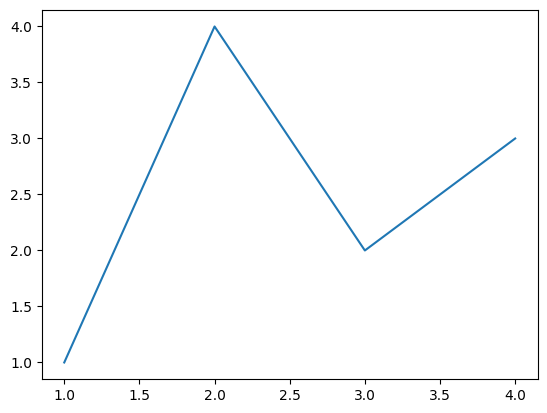

In [3]:
# 创建一个包含单个坐标轴的图形
fig, ax = plt.subplots()

# 在坐标轴上绘制一些数据
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

这个例子画了 4 个数据点，数据点之间用线连接起来，`plot()` 传入了两个数组，第一个数组为数据点的 X 坐标，第二个数组为数据点的 Y 坐标。

## 基本概念

```{figure} ../img/ch-visualization/figure.svg
---
name: figure-img
---
matplotlib中 figure 的组成部分
```

### 图形 `Figure` 

`Figure` 是 Matplotlib 中的顶层容器，它用于容纳所有子坐标轴（`Axes`）、一组特殊的图元（如标题、图例、色条等）以及嵌套的子图。一个图形可以包含一个或多个子 `Axes`。

以下是一些创建 Figure 的示例：

1. 创建一个空白的 Figure。

In [4]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

2. 创建一个带有 `Axes` 的 `Figure`。

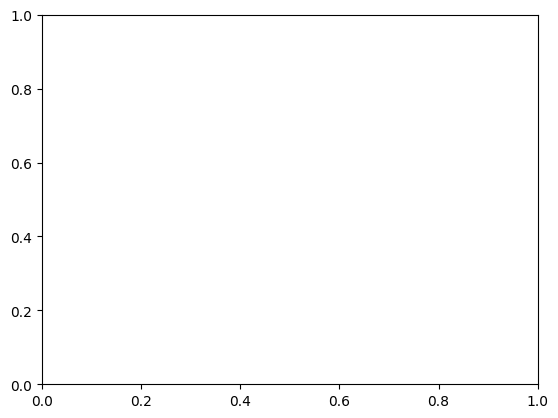

In [5]:
fig, ax = plt.subplots()

3. 创建一个带有 2x2 `Axes` 的 `Figure`，即一共 4 个 `Axes`。

当存在多个 Axes 时，可以用变量 `axs` 指向各个 Axes，用 `axs[x, y]` 选择一个子图，然后在子图上面作图。

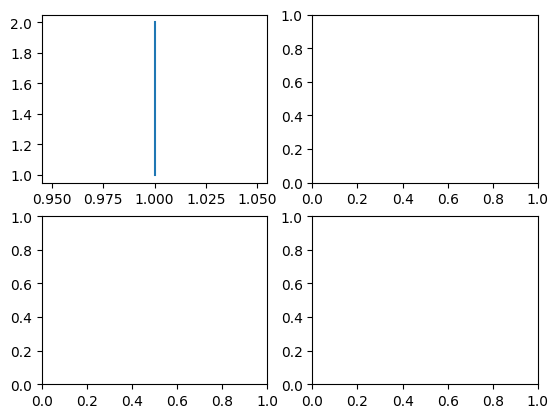

In [6]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot([1, 1], [1, 2])

也可以像下面这样获得各个子图。

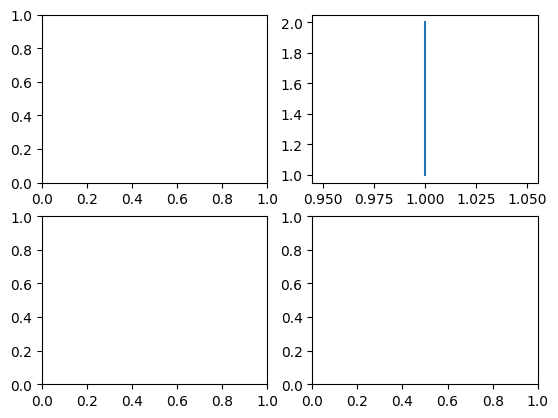

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax2.plot([1, 1], [1, 2])

4. 创建一个带有一个左侧 `Axes` 和两个右侧 `Axes` 的 `Figure`。

这里我们使用了 `subplot_mosaic()` 方法，它可以设置更复杂的布局。

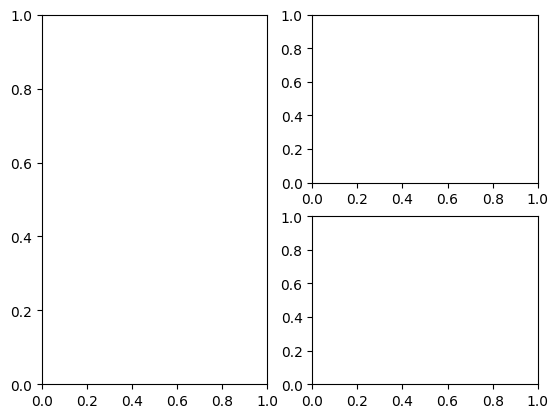

In [8]:
fig, axs = plt.subplot_mosaic([['left', 'right_top'], ['left', 'right_bottom']])

5. 创建一个尺寸大小为 5*2.7 的 Figure，布局参数 layout 设置为 `constrained`。

`figsize` 和 `layout` 是 `Figure` 对象的参数，`figsize` 用来指定画布大小，`layout` 用于指定绘图中的元素布局机制，以避免重叠的坐标轴装饰（例如标签、刻度等）。

具体来说，`layout` 参数有：
- `constrained`（默认值）：约束布局（Constrained Layout）机制会自动调整坐标轴的大小，以避免坐标轴装饰重叠。它适用于复杂的绘图布局，可以处理具有多个坐标轴和色条的情况，通常是推荐的选项。

- `compressed`：使用与 `constrained` 相同的算法，但去除了固定纵横比坐标轴之间的额外间隔。最适合简单的坐标轴网格。

- `tight`：使用紧凑布局机制，这是一个相对简单的算法，调整子图参数以避免装饰重叠。

- `none`：不应用特定的布局机制，子图的布局将遵循默认行为。

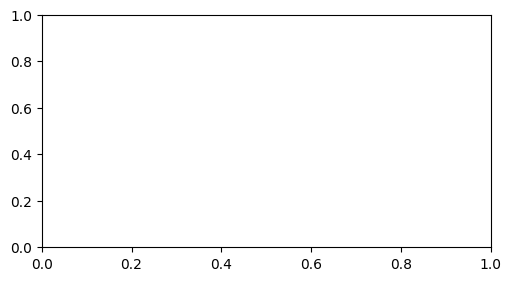

In [9]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

### 坐标轴 `Axes`

坐标轴（`Axes`）是附加到图形（`Figure`）的一个图元（`Artist`）。每个 `Axes` 是具体绘制数据的区域，通常包括两个坐标轴对象（`Axis`），在 3D 情况下为三个坐标轴对象。每个坐标轴对象都有刻度线和刻度标签，用于为坐标轴上的数据提供刻度标尺。每个 Axes 还可以具有标题（通过 `set_title()` 方法设置）、X 轴标签（通过 `set_xlabel()` 方法设置）和 Y 轴标签（通过 `set_ylabel()` 方法设置）。

Axes 类提供了很多成员方法，用来对这个 Axes 进行细粒度的刻画。Axes 类基于面向对象编程（OOP）思想。例如，上面提到的 `ax.plot()` 使用 `plot()` 方法绘制线图。

```{note}
注意不要混淆 `Axes` 和 `Axis`。 `Axes`（复数形式）通常指的是一个子图，严谨地说，`Axes` 是一个绘图区域或数据可视化的区域，可以在这个区域创建和展示数据图表。一个 `Axes` 对象通常包括 X 轴和 Y 轴，用于绘制和展示数据。`Axis`（单数形式）通常指的是坐标轴，例如 X 轴或 Y 轴，它用于设置刻度、刻度标签和控制坐标轴的属性。Matplotlib 中的 `Axis` 对象负责管理坐标轴上的刻度和刻度标签。
```

#### `Axis` 对象设置

`ax.set()` 方法接受一个包含关键字参数的字典，每个关键字对应一个坐标轴属性，用来精细化地设置 `Axis` 对象。具体来说，`xlim` 和 `ylim` 分别设置 X 轴和 Y 轴的范围，`xticks` 和 `yticks` 分别设置 X 轴和 Y 轴上的刻度位置。或者直接使用 `ax.set_xlim()`, `ax.set_ylim()`, `ax.set_xticks()`, `ax.set_yticks()` 等方法设置这些参数。一方面，这种设置可以帮助我们调整图形的外观，更符合需求；另一方面，也可以规避一些错误。

例如，

（1）设置 X 轴的范围是 0 到 4，刻度是 1 到 3；Y 轴的范围是 0 到 3，刻度是 1 到 2。
（2）设置 X 轴的范围是 0 到 4，刻度是 1 到 3；Y 轴的范围是 0 到 11，刻度是 1 到 2。

可以发现，当改变 Y 轴范围时，同样的波动在视觉上会变小，有时候会影响判断。

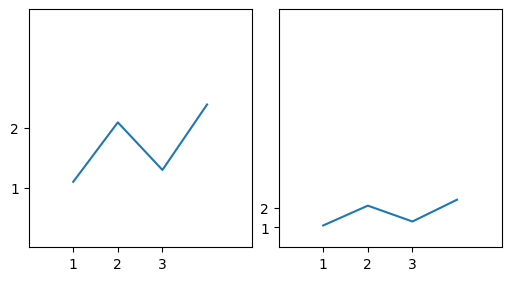

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(5, 2.7), layout='constrained')

ax1.set(xlim=(0, 5), xticks=np.arange(1, 4),
       ylim=(0, 4), yticks=np.arange(1, 3))
ax1.plot([1,2,3,4],[1.1, 2.1, 1.3, 2.4])

ax2.set(xlim=(0, 5), xticks=np.arange(1, 4),
       ylim=(0, 12), yticks=np.arange(1, 3))
ax2.plot([1,2,3,4],[1.1, 2.1, 1.3, 2.4])

## 输入数据

Matplotlib 通常会和 pandas 和 NumPy 一起使用，Matplotlib 可绘制的数据大概有:

1. NumPy 数组（`numpy.array`）或 `numpy.ma.masked_array`。

2. 可以转换为 NumPy 数组的对象。如 pandas 数据和 `numpy.matrix`。可以使用 `numpy.asarray()` 方法将其他类型的数据转化为 NumPy 数据。

3. Key-Value 数据结构：比如字典（dict），结构化的有 Key-Value 结构的 Numpy 数组（Structured NumPy Array）或 pandas DataFrame。Matplotlib 允许通过 data 参数传递这些对象，并传递与 x 和 y 变量对应的字符串。

### 案例：Key-Value 数据

输入为 Key-Value 的数据，Value 为用 NumPy 库随机生成 50 个点，并用 `scatter()` 方法作出散点图.

Text(0, 0.5, 'entry b')

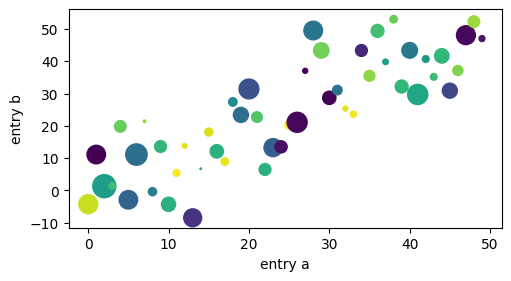

In [ ]:
# 设置随机数种子以确保结果的可复现
np.random.seed(123)
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

具体来说，共有 5 个步骤。

第一步: 构建字典，`a` 为 0,1,2,...,49 五十个数作为横坐标，`c` 为五十个随机整数作为画图的颜色，`d` 为五十个随机数作为每个圆点的大小。

第二步: 对 `a` 做变换得到 `b`，作为画图纵坐标 Y；由于点的大小不应该为负数，因此用 `np.abs()` 取绝对值。

第三步: 用前述 `plt.subplots()` 方法生成 `fig` 和 `ax`。

第四步: 在 ax 上画点图，写明参数 `x='a', y='b', c='c', s='d',data=data`，c(color) 指明颜色，s(size) 指明大小，data 来自于我们构建的字典，因此参数中使用的时候，相当于使用字典的 `key` 字符串，需要有引号。

第五步: 用 `set_xlabel()` 和 `set_ylabel()` 方法为 X 轴和 Y 轴添加文本标签，也就是轴标题。

## 编程方式
基本上有两种使用 Matplotlib 的方法：
1. 依靠 pyplot 自动创建和管理图形和轴，并使用 pyplot 函数进行绘图。简单来说，就是直接用plt.\[function_name]()函数作图。

2. 面向对象编程：`.subplots()`显式创建图形和轴，再调用对应的绘图方法。这种方法更为复杂具体，但能满足我们许多精细的要求。

#### 例：在一个坐标轴上作出 $y=x, y=x^2, y=x^3$ 的三条曲线

1. pyplot style

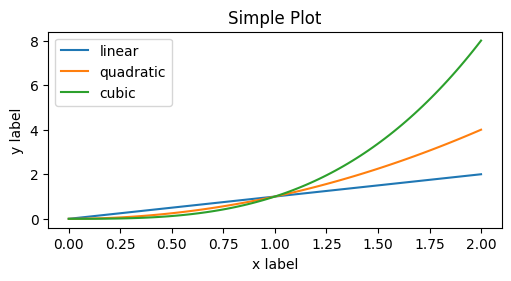

In [ ]:
x = np.linspace(0, 2, 100)  # 创建一个包含100个点的线性空间，范围从0到2，用作示例数据
plt.figure(figsize=(5, 2.7), layout='constrained') #直接用plt.figure创建图
plt.plot(x, x, label='linear') #在坐标轴上绘制数据，绘制一条线性函数曲线，标签为'linear'
plt.plot(x, x**2, label='quadratic')   # 在同一个坐标轴上绘制二次函数曲线，标签为'quadratic'。
plt.plot(x, x**3, label='cubic') #在同一个坐标轴上绘制三次函数曲线，标签为'cubic'。
plt.xlabel('x label') # 为 X 轴添加标签，将X轴标签设置为'x label'
plt.ylabel('y label')  # 为 Y 轴添加标签，将Y轴标签设置为'y label'
plt.title("Simple Plot") # 为坐标轴添加标题，将标题设置为'Simple Plot'
plt.legend() # 添加图例，以便显示每条曲线的标签

2. OO-style

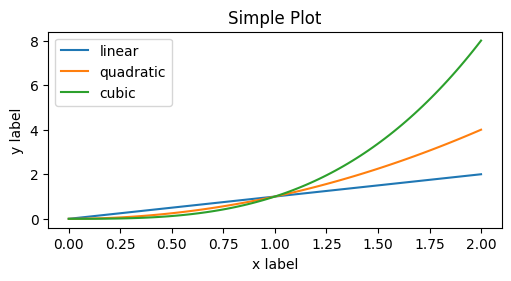

In [10]:
import numpy as np
x = np.linspace(0, 2, 100)  # 创建一个包含100个点的线性空间，范围从0到2，用作示例数据
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')#创建一个大小为5x2.7英寸的图形（Figure），并使用constrained_layout参数启用了约束布局。然后，创建了一个坐标轴对象ax，可以用来绘制数据。
ax.plot(x, x, label='linear')  #在坐标轴上绘制数据，绘制一条线性函数曲线，标签为'linear'
ax.plot(x, x**2, label='quadratic')  # 在同一个坐标轴上绘制二次函数曲线，标签为'quadratic'。
ax.plot(x, x**3, label='cubic')  #在同一个坐标轴上绘制三次函数曲线，标签为'cubic'。
ax.set_xlabel('x label')  # 为 X 轴添加标签，将X轴标签设置为'x label'
ax.set_ylabel('y label')  # 为 Y 轴添加标签，将Y轴标签设置为'y label'
ax.set_title("Simple Plot")  # 为坐标轴添加标题，将标题设置为'Simple Plot'
ax.legend()  # 添加图例，以便显示每条曲线的标签



## 创建自己的绘图函数
如果需要对不同的数据集一遍又一遍地绘制相同的图，或者希望轻松封装Matplotlib方法，可以使用函数。


例：在坐标轴上绘制点的线图。

构建如下函数，传入参数有
- 坐标轴
- 要在 X 轴上绘制的数据
- 要在 Y 轴上绘制的数据
- 其余传给.plot()的参数（需要为字典的形式）

In [11]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

接着就可以调用my_plotter进行画图，这里传入plot函数的marker参数，意思是不同的点标记为 x 或 o 。

对于 marker 参数，matplotlib支持多种类别的标记取值：
- 未填充标记：这些标记是空心的，通常用于表示数据点的位置。

- 填充标记：这些标记是实心的，通常用于强调数据点。

- 从TeX符号创建的标记：这些标记可以使用TeX符号来表示，例如，"$\alpha$" 表示α。

- 从路径创建的标：这些标记可以从自定义路径创建，允许创建具有自定义形状的标记。


这里的 x 和 o 是常见的实心标志，常见的空心标志有'1'，'2'等等，具体可以自行查找。



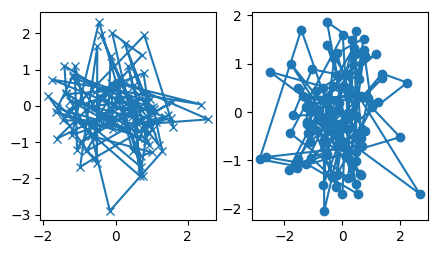

In [12]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # 创建4个随机数据集，每个数据集包含100个数
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## 其他参数设置
为了画图更美观、更满足我们需求，还有很多参数可以设置，包括线条式样、颜色等。

### 线条式样
例：我们在同一个坐标轴上画出两条直线，x=0,1,...99，y为对应data的累积值，颜色`color`参数分别为蓝色和橙色，线宽`linewidth`参数分别为3和2，线条样式`linestyle`参数为虚线和冒号。

> `l, `用法是为了解包 ax.plot 返回的对象。当绘制折线图时，ax.plot 返回一个包含绘制的折线对象的列表。通过使用 `l, = ax.plot(...)`，将列表中的对象解包到变量 l 中，后续则可以修改这些对象的属性，例如本处修改线条样式。

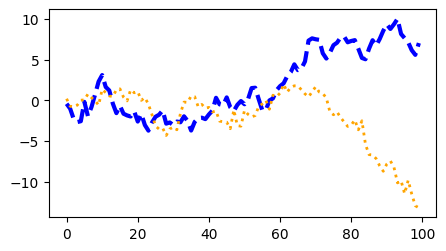

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l,= ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### 颜色
除了上面的例子设置的线条颜色，颜色还有更精准的设置，有些图形元素可以接受多种颜色，例如散点图中，标记的边缘颜色可以不同于内部颜色。

例：散点图的点内部渲染为蓝色，边缘为黑色。

> 在Matplotlib中，"C0" 和 "k" 是用于表示颜色的字符串。 "C0" 表示默认颜色循环中的第一个颜色。Matplotlib通常使用颜色循环来为不同的数据系列分配不同的颜色，以便它们在图中更容易区分。在这里，"C0" 表示颜色循环中的第一个颜色，通常是蓝色。"k" 是使用单个字符来表示颜色，"k" 代表黑色，常见的还有 b--蓝色， c--青色，g--绿色，m--紫红色，r--红色，w--白色，y--黄色。更多的颜色可以自行搜索。


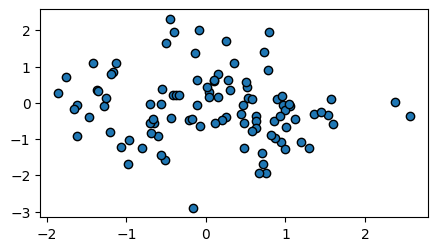

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, facecolor='C0', edgecolor='k')

### 图例

`.legend()`用来给图像增加图例，图例是对图像上各种符号和颜色所代表内容和指标的说明，以便于更好地理解图。

当在坐标轴ax上画图时，传入不同的label参数，legend函数则会对不同的label作出图例。

例：对前面生成的四个随机数据集data1，data2，data3，data4画出点图，每一个点用不同的形状表示，默认颜色不相同。

（由于只指定了一个数据，因此plot函数默认画点图，横坐标为数据的index）



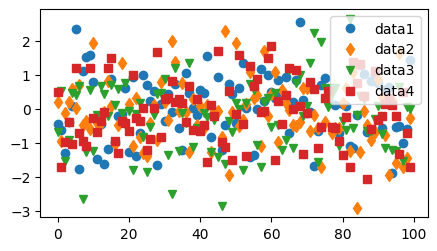

In [15]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

#### 参数loc设置图例位置

例：图例放右上方。

> 常见参数有 “upper right”,"upper left","lower left","lower right","right","center left","best"等。



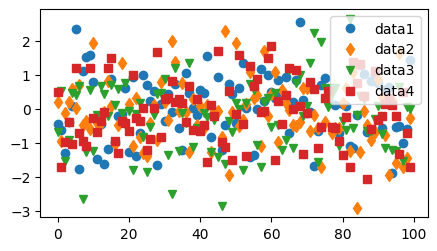

In [16]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend(loc='upper right')

## 可视化种类
除了前面例子中使用的`.scatter()`画散点图，`.plot()`画点线图，还有多种图形方法可供选择。

### `.bar()` 方法绘制柱状图

柱状图是一种常见的统计图表，用于展示不同类别或组之间的数量关系。它通过在坐标轴上以柱状的形式表示数据，直观地展示了各类别之间的相对大小或变化趋势。

在柱状图中，通常横轴表示不同的类别或组，纵轴表示数量或其他度量。每个类别或组都用一个垂直的柱子表示，其高度代表相应数据的数值。

`.bar()` 方法绘制柱状图时有很多参数，除了必须指定横坐标和纵坐标之外，还可以用 width 参数指定每个柱子的宽度，边缘线颜色、宽度，内部的颜色等。可以通过下面的例子体会一下：

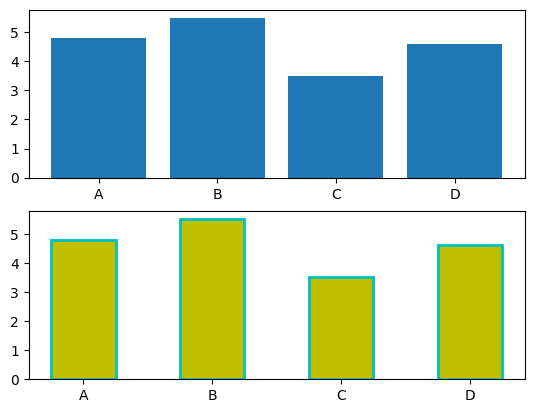

In [27]:
x = ['A','B','C','D']
y = [4.8, 5.5, 3.5, 4.6]

# plot
fig, ax = plt.subplots(2,1)
ax[0].bar(x, y)
ax[1].bar(x, y, width=0.5, facecolor='y',edgecolor="c", linewidth=2)


plt.show()

### `.stem()`方法绘制茎叶图
茎叶图强调每个数据点的具体值，并在该值处绘制垂直线。这种图形常用于显示数据的分布和变化趋势，特别适用于离散数据。

与传统的柱状图（bar chart）相比，stem 图更注重显示每个数据点的具体值，而不是强调整体的分布。这使得 stem 图在特定情境下更具优势，尤其是当关注数据点的绝对值时。

例：使用柱状图的数据画茎叶图，并调整（1）每个数据点处使用红色圆圈标记；（2）用绿色实线作为基线（3）蓝色虚线连接垂直线。


Text(0.5, 1.0, 'modify linefmt')

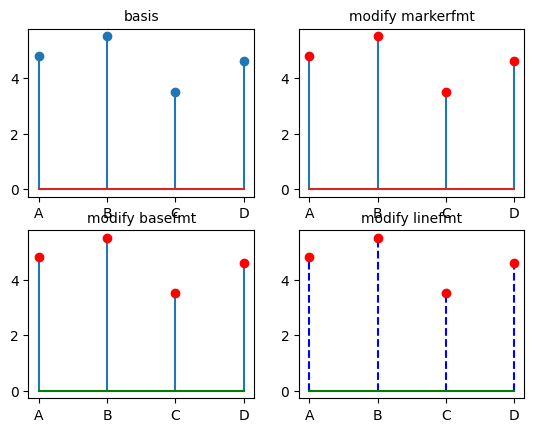

In [34]:
## 柱状图的数据
fig, ax = plt.subplots(2, 2)
ax[0,0].stem(x, y)
ax[0,0].set_title('basis',size=10)
ax[0,1].stem(x, y, markerfmt='ro')
ax[0,1].set_title('modify markerfmt',size=10)
ax[1,0].stem(x, y, markerfmt='ro', basefmt='g-')
ax[1,0].set_title('modify basefmt',size=10)
ax[1,1].stem(x, y, markerfmt='ro', basefmt='g-', linefmt='b--')
ax[1,1].set_title('modify linefmt',size=10)


### `.pie()`方法绘制饼图
用于表示整体中各部分的相对比例。它通常以圆形的方式展示数据，将整个圆分为扇形，每个扇形的角度表示相应部分占总体的比例。通常用于分类数据。

例：对一个列表画图，需要先统计出现的次数，转为字典，将字典中的值作为数据，字典中的键作为标签参数传入。

- autopct='%1.1f%%' 参数用于显示百分比；
- startangle 设置起始角度为90度。

统计结果为{'B': 1, 'C': 1, 'A': 2}


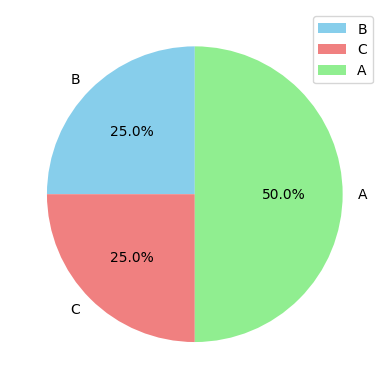

In [20]:
X = ['A','B','C','A']
# 统计各元素出现的次数
counts = {label: X.count(label) for label in set(X)}
print('统计结果为{}'.format(counts))
# 饼图
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.legend()

### `.hist()`方法绘制直方图

直方图是一种用于可视化数据分布的图表类型，通过将数据划分为多个连续的区间（也称为箱子或柱(bins)），并在每个区间内绘制相应的频率或数量来展示数据的分布情况。直方图常用于了解数据的中心趋势、离散程度和异常值。

该函数也有类似的许多参数，比较重要的是设置分箱数bins，请看下例：

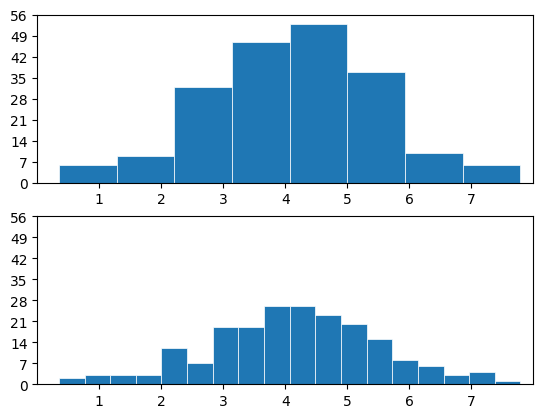

In [21]:
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots(2,1)

ax[0].hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax[0].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))


ax[1].hist(x, bins=18, linewidth=0.5, edgecolor="white")

ax[1].set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))


plt.show()

### `.boxplot()`方法绘制箱线图

箱线图是一种用于汇总和比较多个数据集分布的有效可视化工具，可以显示数据的中心趋势、离散程度以及异常值情况。
参数有：
- positions=[2, 4, 6]：设置箱线图的位置，即在 X 轴上的位置。
- widths=1.5：设置箱体的宽度。
- patch_artist=True：将箱体以及中位数点着色。
- showmeans=False 和 showfliers=False：禁止显示均值点和异常值。
- medianprops, boxprops, whiskerprops, capprops：用于设置中位数线、箱体、内涵因子和异常值的样式。


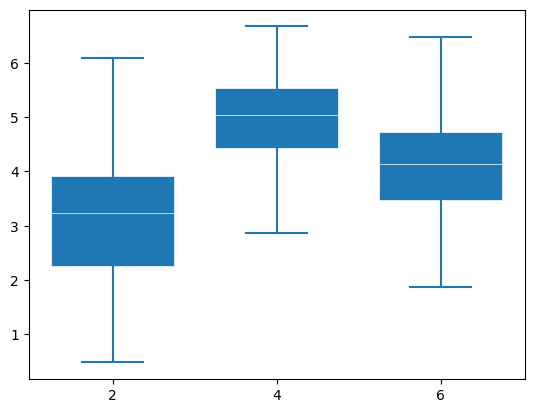

In [25]:
np.random.seed(10)
#生成一个包含 100 行和 3 列的三维正态分布的数据
#均值分别为 (3, 5, 4)，标准差分别为 (1.25, 1.00, 1.25)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))
# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

plt.show()